# **Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# **Data collection**

In [ ]:
new_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Results']
iris_original_dataset = pd.read_csv("/content/iris.data",names = new_names)

In [ ]:
iris_original_dataset.shape


(150, 5)

In [ ]:
#first five rows of the dataset

iris_original_dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Results
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#checking for missing values

iris_original_dataset.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Results         0
dtype: int64

# **Data analysis and visualization**

In [ ]:
# statistical measures

iris_original_dataset.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_original_dataset['Results'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Results, dtype: int64

# **With Catplot**

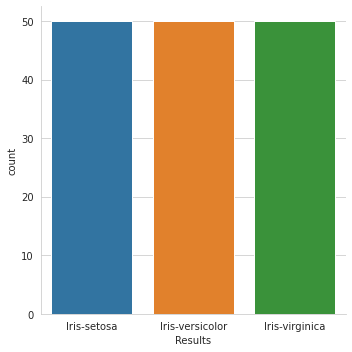

In [ ]:
sns.catplot(x = "Results", data = iris_original_dataset, kind = 'count')

# **With Countplot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


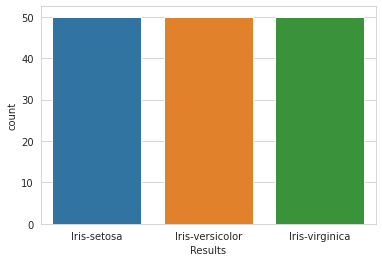

In [ ]:
sns.countplot(iris_original_dataset['Results'])

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


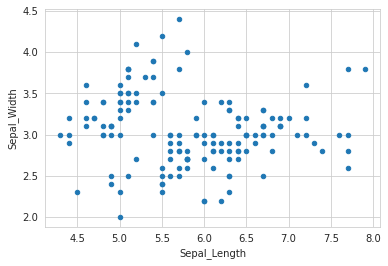

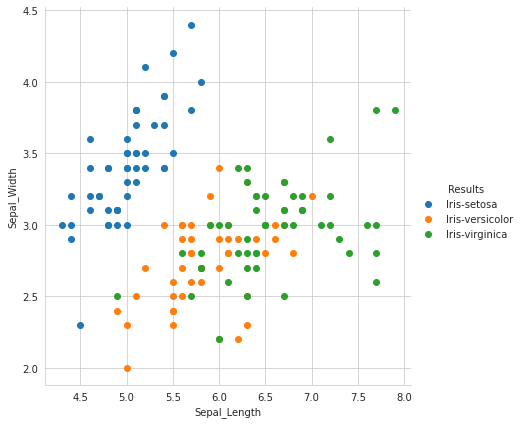

In [ ]:
iris_original_dataset.plot(kind='scatter',x = 'Sepal_Length',y = 'Sepal_Width',)
sns.set_style('whitegrid')
sns.FacetGrid(iris_original_dataset, hue = 'Results',size = 6).map(plt.scatter,'Sepal_Length', 'Sepal_Width').add_legend()

# **Pairplot**

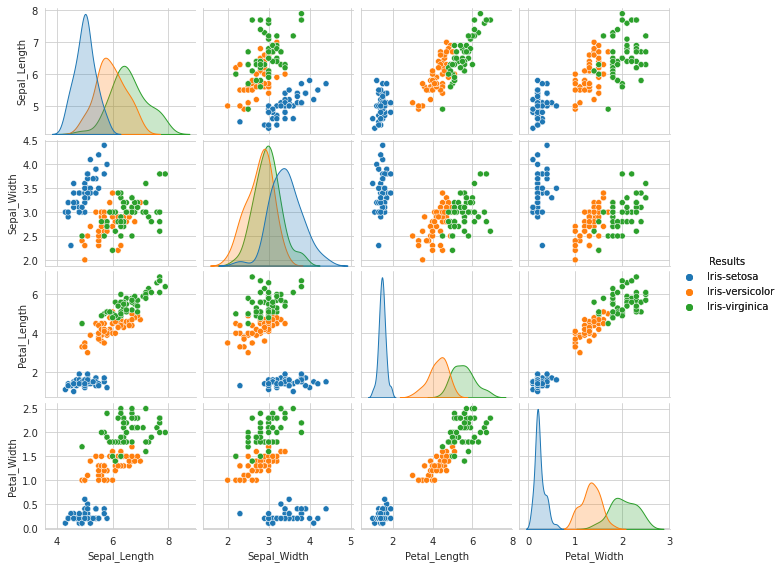

In [ ]:
sns.pairplot(iris_original_dataset,hue = 'Results',height = 2).add_legend()

# **Categorical column into integer**

In [ ]:
for column in iris_original_dataset.columns:
  if iris_original_dataset[column].dtype == np.number:
    continue
  
  iris_original_dataset[column] = LabelEncoder().fit_transform(iris_original_dataset[column])


<ipython-input-62-0c848b78220f>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if iris_original_dataset[column].dtype == np.number:


In [ ]:
iris_original_dataset.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Results           int64
dtype: object

In [ ]:
iris_original_dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Results
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x = iris_original_dataset.drop(['Results'],axis = 1)
y = iris_original_dataset['Results']

In [ ]:
x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Results, Length: 150, dtype: int64

# **KNN Classifier**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
knn_range = list(range(1,12))
acc = []
for i in knn_range:
  knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
  y_predict = knn.predict(x_test)
  acc.append(metrics.accuracy_score(y_test,y_predict))

In [ ]:
acc

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777]

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train,y_train)
y_predict = knn.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,y_predict)

0.9333333333333333